<a href="https://colab.research.google.com/github/WHARN0/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

  Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

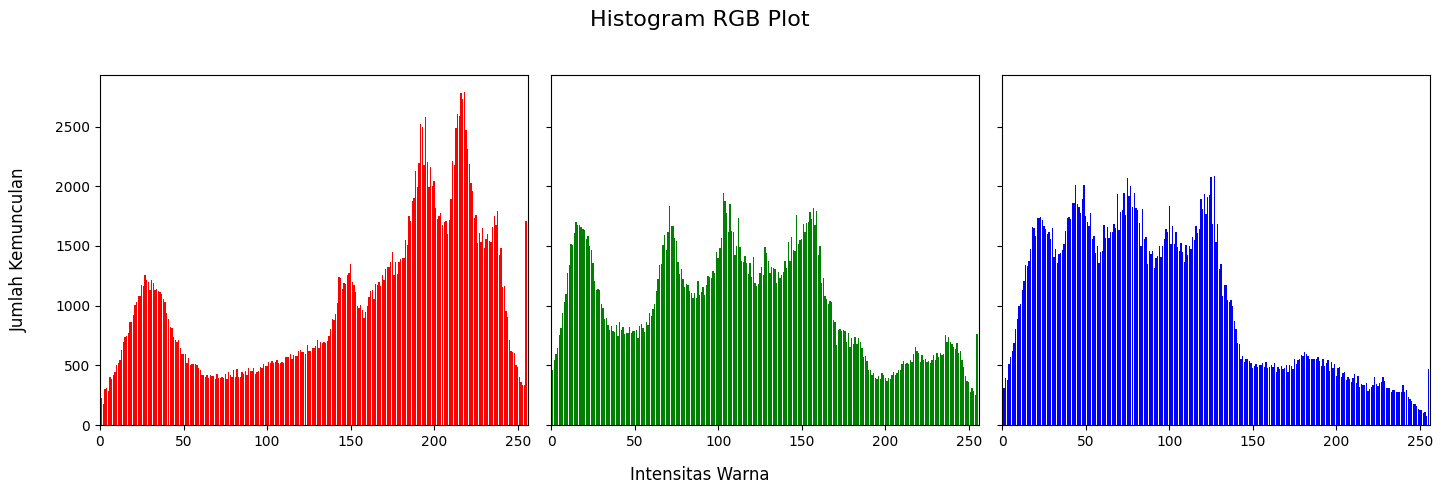

In [6]:
Image = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'

Img = cv.imread(Image)

LenaImg = cv.cvtColor(Img, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

colors = ('r', 'g', 'b')

for i, color in enumerate(colors):
    hist = cv.calcHist([LenaImg], [i], None, [256], [0, 256])
    axs[i].bar(np.arange(256), hist[:, 0], color=color, width=0.8, alpha=1.0)
    axs[i].set_xlim([0, 256])
    axs[i].set_xticks(np.arange(0, 256, 50))

fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)

fig.suptitle('Histogram RGB Plot', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.1)
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

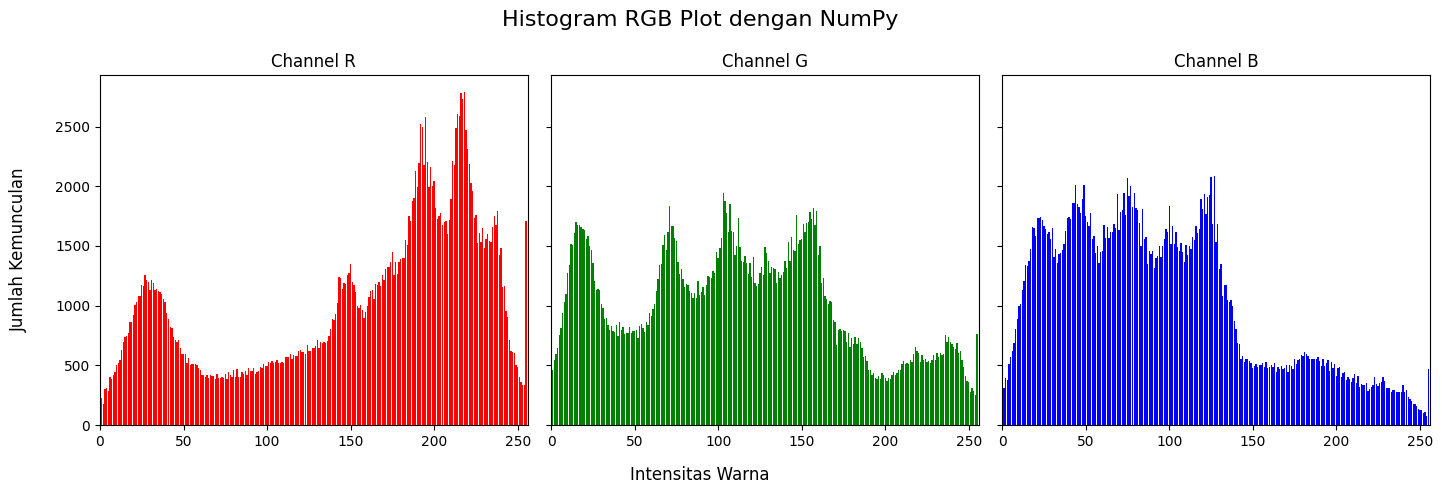

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Image = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'

Img = cv.imread(Image)
LenaImg = cv.cvtColor(Img, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

colors = ('r', 'g', 'b')

for i, color in enumerate(colors):
    hist, bins = np.histogram(LenaImg[:, :, i].ravel(), bins=256, range=[0, 256])
    axs[i].bar(np.arange(256), hist, color=color, width=0.8, alpha=1.0)
    axs[i].set_xlim([0, 256])
    axs[i].set_xticks(np.arange(0, 256, 50))
    axs[i].set_title(f'Channel {color.upper()}')

fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Histogram RGB Plot dengan NumPy', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.1)
plt.show()


5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [11]:
Image = '/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg'

Img = cv.imread(Image)
LenaLcImg = cv.cvtColor(Img, cv.COLOR_BGR2RGB)

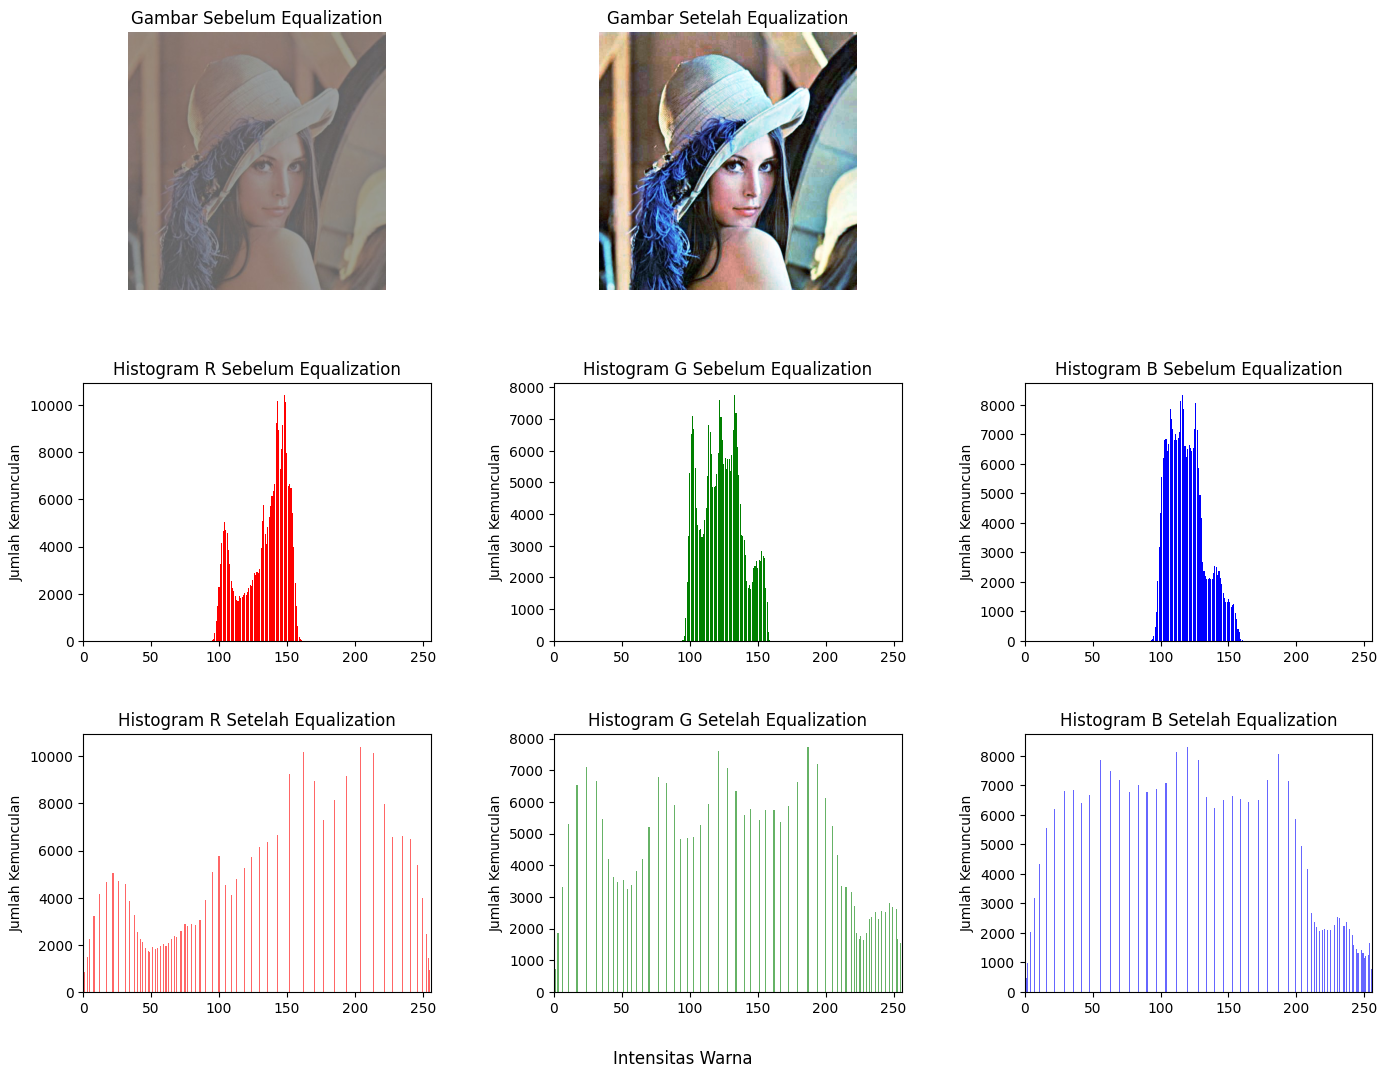

In [56]:
r_channel, g_channel, b_channel = cv.split(LenaLcImg)

r_eq = cv.equalizeHist(r_channel)
g_eq = cv.equalizeHist(g_channel)
b_eq = cv.equalizeHist(b_channel)

img_eq_rgb = cv.merge((r_eq, g_eq, b_eq))

colors = ('r', 'g', 'b')
hist_before = [cv.calcHist([LenaLcImg], [i], None, [256], [0, 256]) for i in range(3)]
hist_after = [cv.calcHist([img_eq_rgb], [i], None, [256], [0, 256]) for i in range(3)]

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

axs[0, 0].imshow(LenaLcImg)
axs[0, 0].set_title('Gambar Sebelum Equalization')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_eq_rgb)
axs[0, 1].set_title('Gambar Setelah Equalization')
axs[0, 1].axis('off')

axs[0, 2].axis('off')

for i, color in enumerate(colors):
    axs[1, i].bar(np.arange(256), hist_before[i][:, 0], color=color, width=0.8, alpha=1.0)
    axs[1, i].set_xlim([0, 256])
    axs[1, i].set_title(f'Histogram {color.upper()} Sebelum Equalization')
    axs[1, i].set_ylabel('Jumlah Kemunculan')

for i, color in enumerate(colors):
    axs[2, i].bar(np.arange(256), hist_after[i][:, 0], color=color, width=0.8, alpha=0.6)
    axs[2, i].set_xlim([0, 256])
    axs[2, i].set_title(f'Histogram {color.upper()} Setelah Equalization')
    axs[2, i].set_ylabel('Jumlah Kemunculan')

plt.tight_layout(pad=4.0)

fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1)
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

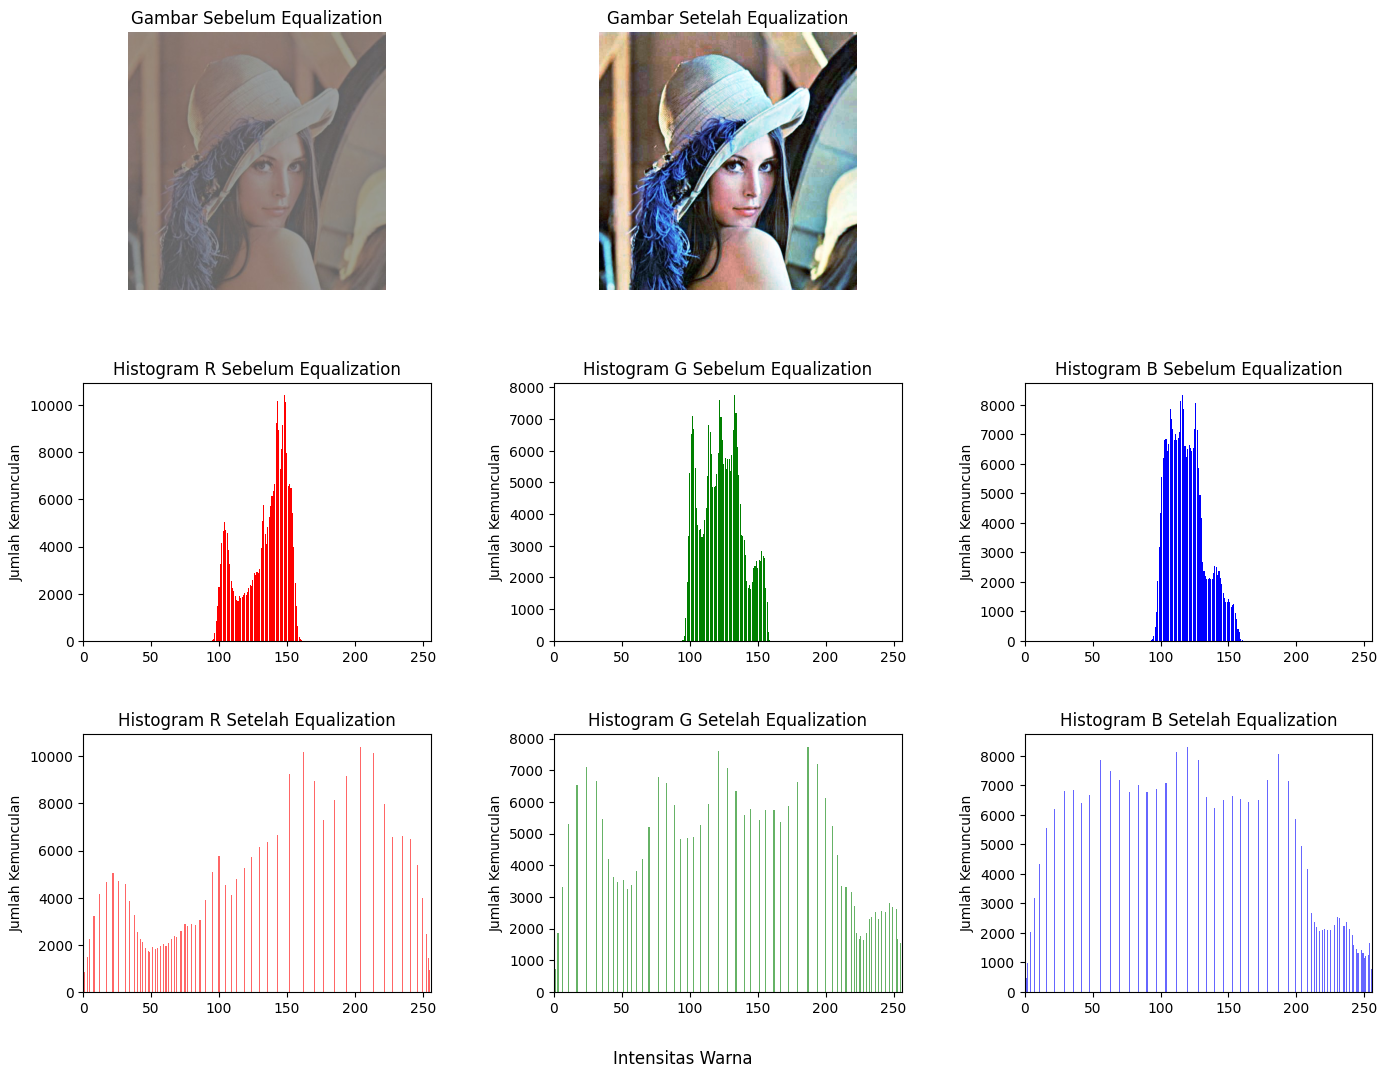

In [55]:
r_channel, g_channel, b_channel = cv.split(LenaLcImg)

r_eq = cv.equalizeHist(r_channel)
g_eq = cv.equalizeHist(g_channel)
b_eq = cv.equalizeHist(b_channel)

img_eq_rgb = cv.merge((r_eq, g_eq, b_eq))

colors = ('r', 'g', 'b')
hist_before = [cv.calcHist([LenaLcImg], [i], None, [256], [0, 256]) for i in range(3)]
hist_after = [cv.calcHist([img_eq_rgb], [i], None, [256], [0, 256]) for i in range(3)]

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

axs[0, 0].imshow(LenaLcImg)
axs[0, 0].set_title('Gambar Sebelum Equalization')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_eq_rgb)
axs[0, 1].set_title('Gambar Setelah Equalization')
axs[0, 1].axis('off')

axs[0, 2].axis('off')

for i, color in enumerate(colors):
    axs[1, i].bar(np.arange(256), hist_before[i][:, 0], color=color, width=0.8, alpha=1.0)
    axs[1, i].set_xlim([0, 256])
    axs[1, i].set_title(f'Histogram {color.upper()} Sebelum Equalization')
    axs[1, i].set_ylabel('Jumlah Kemunculan')

for i, color in enumerate(colors):
    axs[2, i].bar(np.arange(256), hist_after[i][:, 0], color=color, width=0.8, alpha=0.6)
    axs[2, i].set_xlim([0, 256])
    axs[2, i].set_title(f'Histogram {color.upper()} Setelah Equalization')
    axs[2, i].set_ylabel('Jumlah Kemunculan')

plt.tight_layout(pad=4.0)

fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1)
plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

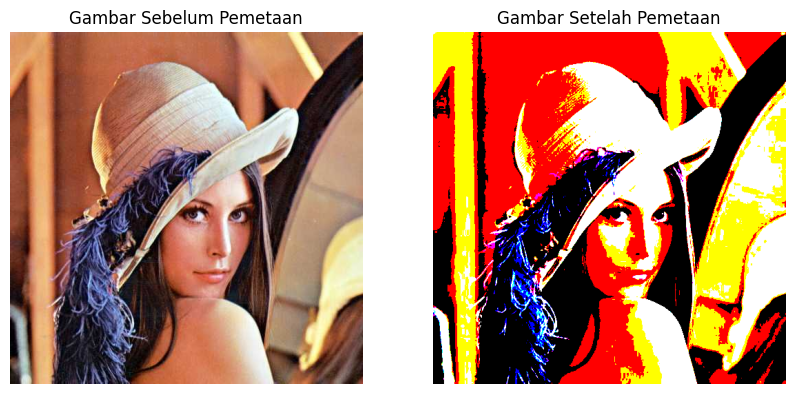

In [51]:
img1 = LenaImg.copy()

color_palette = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'yellow': np.array([255, 255, 0])
}

def calculate_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

def map_color_to_palette(pixel, palette):
    min_distance = float('inf')
    nearest_color = None

    for color_name, color_value in palette.items():
        distance = calculate_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_value

    return nearest_color

mapped_img = np.zeros_like(img1)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        mapped_img[i, j] = map_color_to_palette(img1[i, j], color_palette)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Gambar Sebelum Pemetaan')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.axis('off')
plt.title('Gambar Setelah Pemetaan')

plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

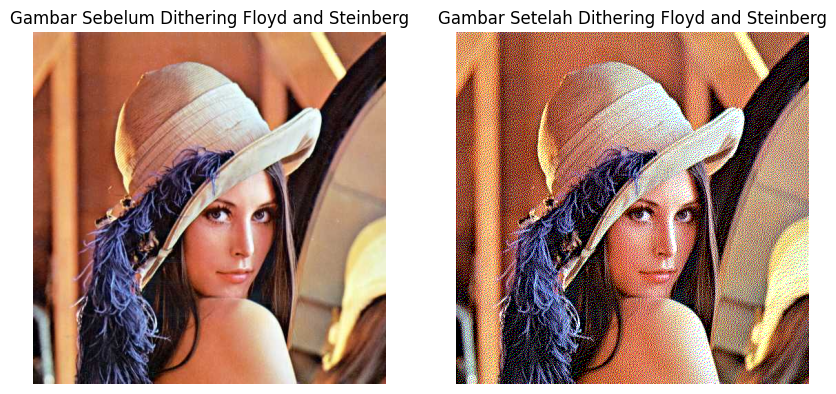

In [71]:
img2 = LenaImg.copy()

def floyd_steinberg_dithering_rgb(image):
    img = image.astype(np.float32)
    h, w, c = img.shape

    for y in range(h):
        for x in range(w):
            for channel in range(c):
                old_pixel = img[y, x, channel]
                new_pixel = np.round(old_pixel / 255) * 255
                img[y, x, channel] = new_pixel
                error = old_pixel - new_pixel

                if x + 1 < w:
                    img[y, x + 1, channel] += error * 7 / 16
                if y + 1 < h:
                    if x > 0:
                        img[y + 1, x - 1, channel] += error * 3 / 16
                    img[y + 1, x, channel] += error * 5 / 16
                    if x + 1 < w:
                        img[y + 1, x + 1, channel] += error * 1 / 16
    return img.astype(np.uint8)

dithered_img_rgb = floyd_steinberg_dithering_rgb(img2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.axis('off')
plt.title('Gambar Sebelum Dithering Floyd and Steinberg')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img_rgb)
plt.axis('off')
plt.title('Gambar Setelah Dithering Floyd and Steinberg')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

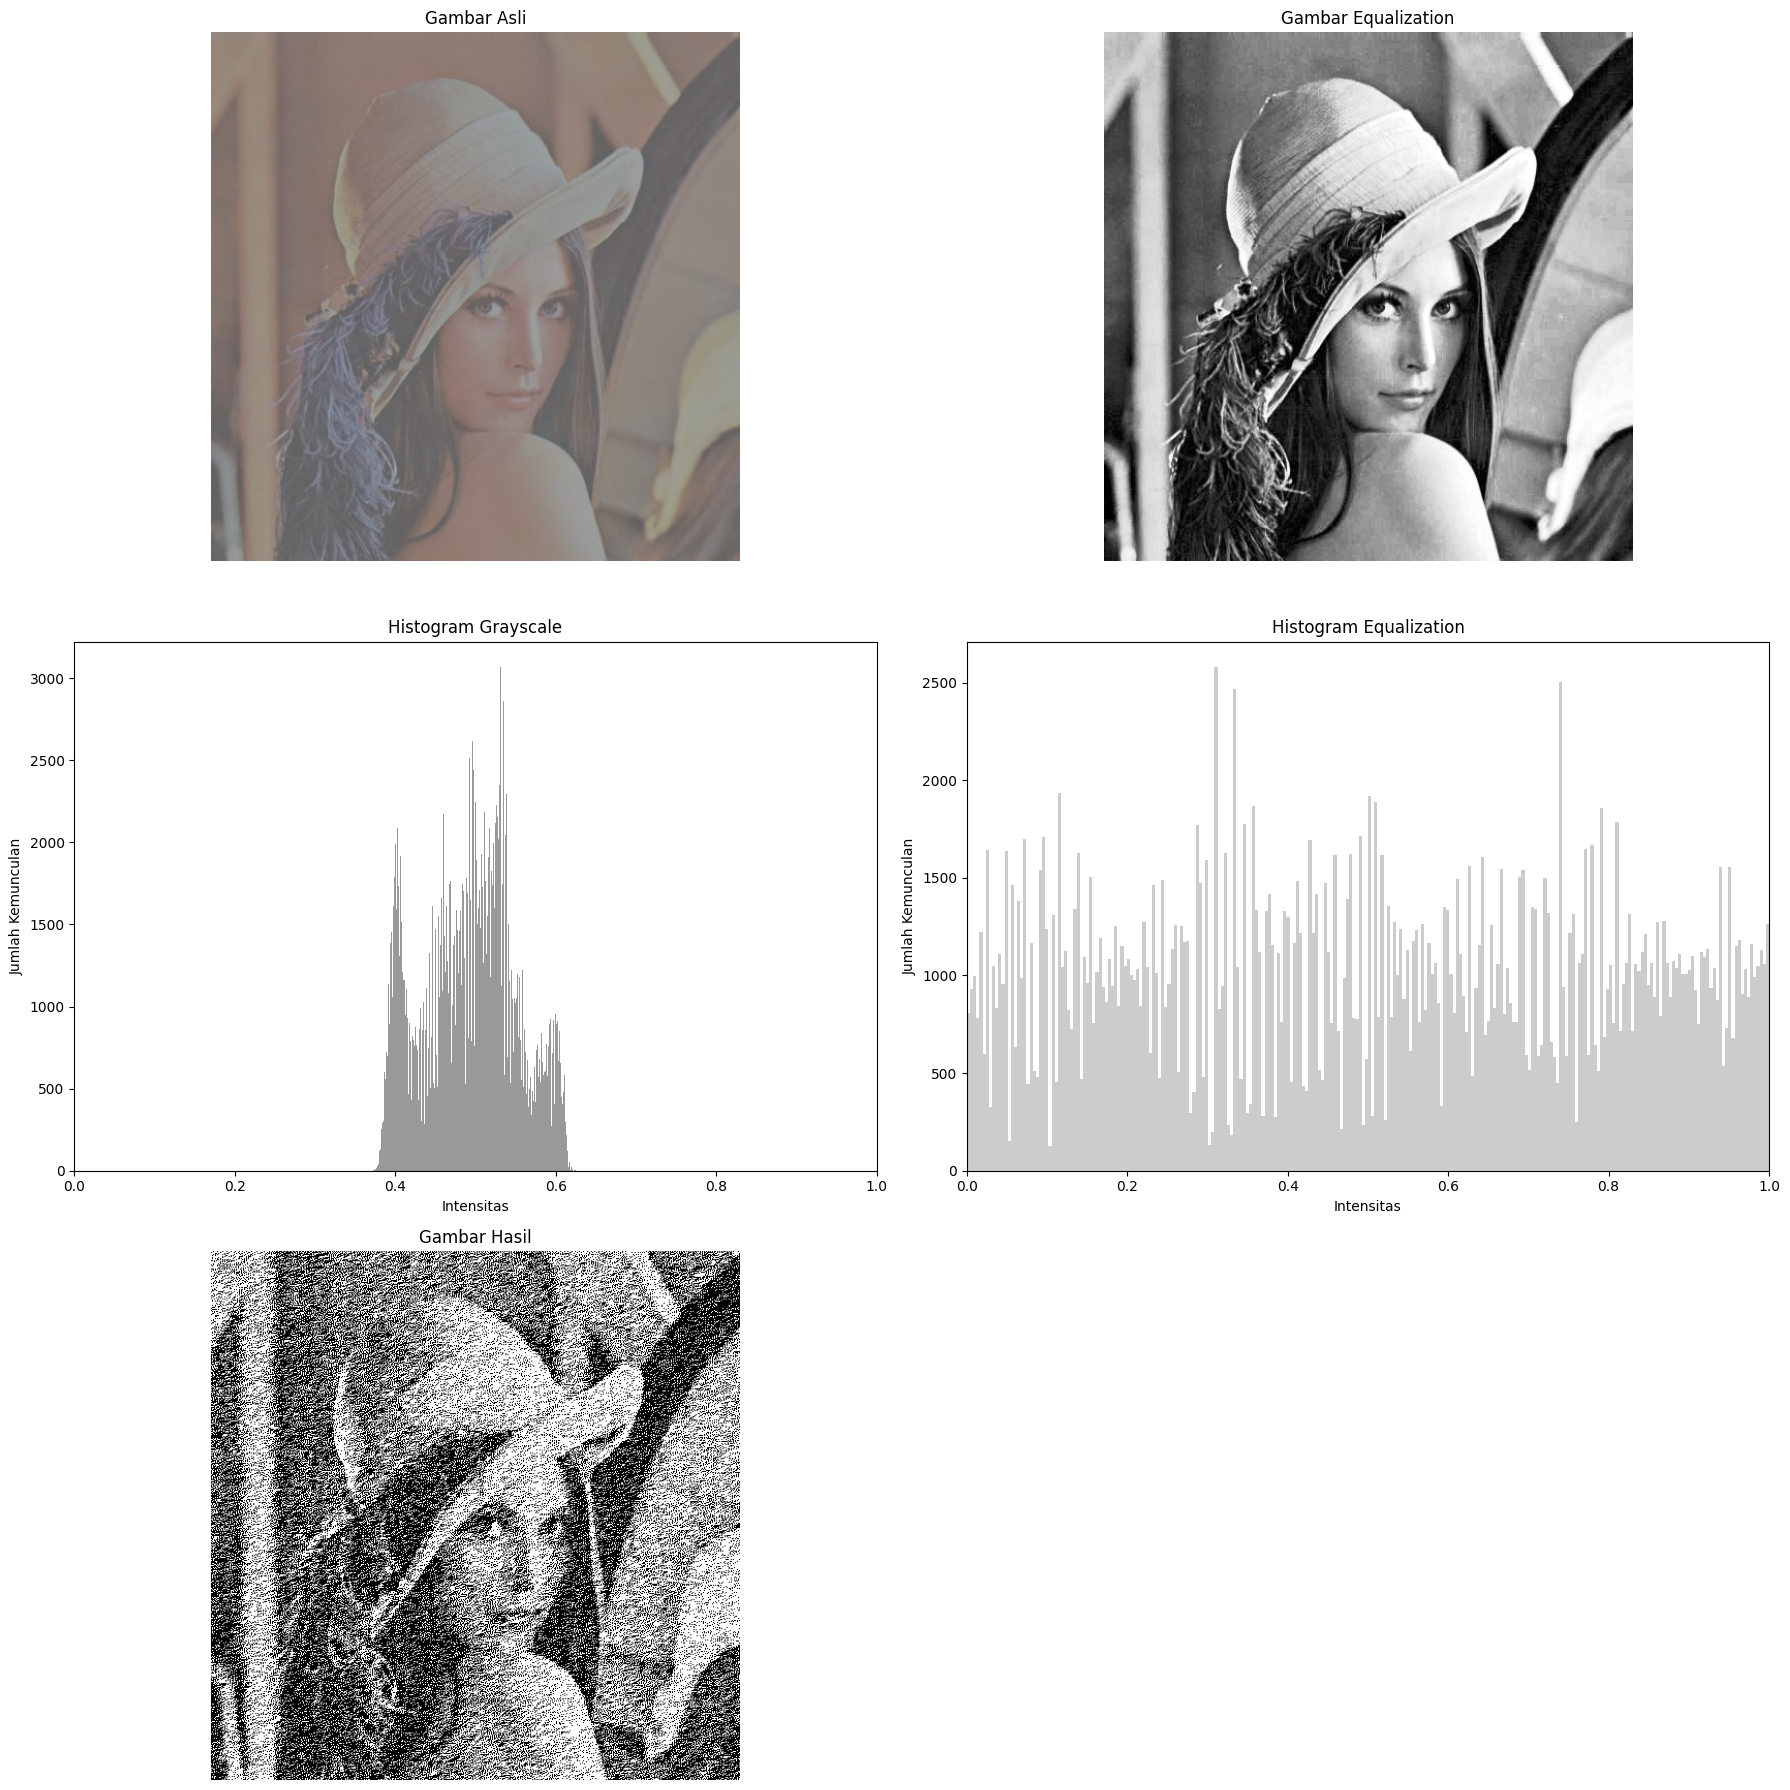

In [73]:
img3 = LenaLcImg.copy()

from skimage import color, exposure

gray_img = color.rgb2gray(img3)

equalized_img = exposure.equalize_hist(gray_img)

def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255
    img = img.astype(np.float32)
    h, w = img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel / 255) * 255
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * error_weights[0]
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * error_weights[1]
                img[y + 1, x] += quant_error * error_weights[2]
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * error_weights[3]

    return np.clip(img, 0, 255).astype(np.uint8)

dithered_img = floyd_steinberg_dithering(equalized_img, error_weights = (1.0, 0.8, 0.7, 0.5))

plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Gambar Equalization')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.8)
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, color='gray', alpha=0.4)
plt.title('Histogram Equalization')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Gambar Hasil')
plt.axis('off')

plt.tight_layout()
plt.show()